# 匯入資料：Google 評論
<b>以新竹遠東巨城購物中心（Big City）為例（共 9147 筆文字評論與星等）</b>
- 評論內容
- 星等（1~5 顆星）

<b>unigram + one-hot encoding + Logistic Regression</b>

### 屬於分類還是迴歸問題？
ordinal regression：預測值屬於順序量尺（Ordinal Scale），介於分類與迴歸之間。

In [69]:
import pandas as pd
df = pd.read_excel('Buona Pasta 金雞母店.xlsx')
df

,評論,星等
0,淡江附近少數好吃的義大利餐廳,5
1,今天吃的一個青醬蛤蠣臭掉了，好臭,1
2,食物還行 培根部分吃起來倒覺得像在吃肥肉(味道).. 紅茶&濃湯可續 店內氣氛相比另一...,4
3,還可，店內擺設不錯，濃湯也好喝。但是辣燉飯只用辣粉調味，味道太單調不適合稱呼是南洋風味。,3
4,好吃歸好吃服務生態度差，餐廳內只有一位客人，出餐效率差服務生容易送錯桌，讓客人白白等候20分...,1
5,店裡空間大 但是人有點多 冷氣只開一台很熱！吃飯一直流汗⋯還是另外一間用餐比較舒服！湯補多也...,1
6,環境不錯，有氣氛，一般民眾學生都消費得宜的價格。不過加麵的話，無限濃湯（湯料很多）就別喝太多...,5
7,烤餅,1
8,Time the time of your arrival cause this place...,4
9,燉飯好吃。,4


# 資料預處理

<b>星等轉為數值型態</b>

In [70]:
df['星等'] = df['星等'].astype('int')

<b>各星等數量分佈</b>

In [71]:
df.groupby('星等').count()

,評論
星等,
1,8
2,2
3,8
4,31
5,51


<b>處理評論內的：(由 Google 提供翻譯)、(原始評論)、\n</b>

範例1：（英文）<br>
(由 Google 提供翻譯) 到目前為止，您唯一可以在新竹與商場，雜貨店，時尚，電影院和所有商店相匹配的地方。你需要知道大多數人會在周末去那裡，所以它會很擁擠。\n\n(原始評論)\nSo far the only place where you can match malls, grocery stores, fashion, cinema, and all in hsinchu. You need to be aware most of the people will go there during weekends so it will be crowded.

範例2：（中文）<br>
(由 Google 提供翻譯) 逛街很方便\n\n(原始評論)\n逛街很方便

範例3：（日文）<br>
(由 Google 提供翻譯) 新竹最大的旅遊景點！\n\n(原始評論)\n新竹で最大の観光名所！

In [72]:
for i in range(len(df)):
    # 刪除原始評論部分文字
    df.loc[i, '評論'] = df.loc[i, '評論'].split('(原始評論)')[0]
    # 將(由 Google 提供翻譯)、\n 取代成空白
    df.loc[i, '評論'] = df.loc[i, '評論'].replace('(由 Google 提供翻譯)', ' ')
    df.loc[i, '評論'] = df.loc[i, '評論'].replace('\n', ' ')

最大顯示 rows 設定

In [73]:
pd.set_option('display.max_rows', 10000)

In [74]:
df

,評論,星等
0,淡江附近少數好吃的義大利餐廳,5
1,今天吃的一個青醬蛤蠣臭掉了，好臭,1
2,食物還行 培根部分吃起來倒覺得像在吃肥肉(味道).. 紅茶&濃湯可續 店內氣氛相比另一...,4
3,還可，店內擺設不錯，濃湯也好喝。但是辣燉飯只用辣粉調味，味道太單調不適合稱呼是南洋風味。,3
4,好吃歸好吃服務生態度差，餐廳內只有一位客人，出餐效率差服務生容易送錯桌，讓客人白白等候20分...,1
5,店裡空間大 但是人有點多 冷氣只開一台很熱！吃飯一直流汗⋯還是另外一間用餐比較舒服！湯補多也...,1
6,環境不錯，有氣氛，一般民眾學生都消費得宜的價格。不過加麵的話，無限濃湯（湯料很多）就別喝太多...,5
7,烤餅,1
8,Time the time of your arrival cause this place...,4
9,燉飯好吃。,4


# 分詞（tokenization）

In [75]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [76]:
import jieba
jieba.load_userdict("dict.txt.big.tw")

因為評論長度偏短，所以在這就先暫不刪除 stopwords，因為其中可能包含帶有情感的單詞，如：嘆詞等 <br>
e.g. 僅僅、寧可、但是、而已、唉...

In [77]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r',encoding="utf-8") as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r',encoding="utf-8") as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add(' ')
punctuation.add('　') #全形空白

In [78]:
bow = set()
comment_bow = dict()
for i in range(len(df)):
    words = [word for word in jieba.cut(df.loc[i,'評論']) if word not in punctuation]
    comment_bow.update({i:set(words)})
    bow = bow.union(set(words))

In [79]:
len(bow)

659

# 製作 one-hot encoding 特徵
註：也可使用 Pandas DataFrame 製作特徵，但速度較使用 numpy ndarray 慢許多。

In [80]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

bow_array = np.array(list(bow)).reshape(-1, 1)
onehot = OneHotEncoder().fit(bow_array)

X = np.ndarray((len(df),len(bow)))
for i in range(len(df)):
    # 少數僅含空白、標點符號之類而被刪除完內容的評論
    if(len(comment_bow[i])==0):
        X[i] = np.zeros((len(bow)))
    else:
        comment_array = np.array(list(comment_bow[i])).reshape(-1, 1)
        comment_onehot = onehot.transform(comment_array).toarray().sum(axis=0)
        X[i] = comment_onehot

In [81]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
X.shape

(100, 659)

# 切分資料

In [83]:
y = df['星等']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 機器學習：多元分類
- 可自行更換其他機器學習演算法
- 可自行調校超參數
- 可自行搭配其他 ML 訓練流程中的方法，如：K-fold cross validation

In [85]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

C: 數值越小，給予越大的正規化（Inverse of regularization strength; Smaller values specify stronger regularization.）

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [87]:
lr.classes_

array([1, 2, 3, 4, 5])

Confusion matrix, without normalization
[[ 7  0  0  0  1]
 [ 0  2  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 22  1]
 [ 0  0  0  0 31]]


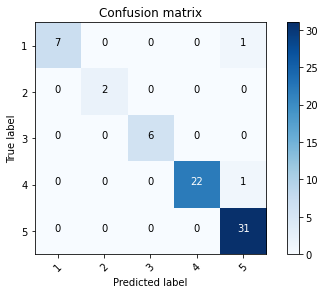

In [88]:
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_train, lr.predict(X_train))
target_names = ['1','2','3','4','5']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')
plt.show()

Confusion matrix, without normalization
[[ 0  1  1]
 [ 0  1  7]
 [ 0  5 15]]


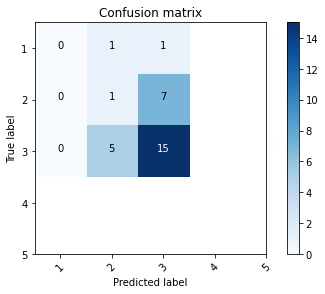

In [89]:
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))

target_names = ['1','2','3','4','5']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      0.96      0.98        23
           5       0.94      1.00      0.97        31

    accuracy                           0.97        70
   macro avg       0.99      0.97      0.98        70
weighted avg       0.97      0.97      0.97        70



In [91]:
print(classification_report(y_test, lr.predict(X_test), target_names=target_names))

ValueError: Number of classes, 3, does not match size of target_names, 5. Try specifying the labels parameter

# 查看一下實際預測資料內容

In [92]:
y_test.index

Int64Index([83, 14, 53, 33, 88, 28, 22,  3, 36, 65, 99, 27, 24,  8,  6, 51, 69,
            32, 78, 85, 48, 57, 34, 94, 70, 84, 71, 80, 55,  2],
           dtype='int64')

In [93]:
df_result = pd.DataFrame({'評論':[],'實際星等':[],'預測星等':[]})

for i in range(len(y_test)):
    index = y_test.index[i]
    df_temp = pd.DataFrame({'評論':df.loc[index,'評論'],'實際星等':df.loc[index,'星等'],
                            '預測星等':lr.predict(X_test[i].reshape(1,-1))})
    df_result = df_result.append(df_temp).reset_index(drop=True)

df_result['實際星等'] = df_result['實際星等'].astype(int)
df_result['預測星等'] = df_result['預測星等'].astype(int)

In [94]:
df_result

,評論,實際星等,預測星等
0,非常好吃， 價位實在又超值,5,5
1,超喜歡他們家！幾乎每道料理都吃過，個人最愛XO醬義大利麵，最多朋友點奶油雞柳，濃湯比牛排店那...,5,5
2,這是一家玉米濃湯跟奶茶專賣店,5,5
3,無意挖掘到這間，跟大直的papa pasta好相似。一樣平價又好吃😋,5,5
4,味美價廉，CP值頗高,4,5
5,份量超多，價格非常實惠的義大利麵餐廳，濃湯與飲料內用無限供應，麵的價格約130～180之間，...,4,5
6,難得能夠吃到不會感到膩的奶油醬，其他口味也是很好吃！另外內用可以享用料很多的濃湯及茶唷~,5,5
7,還可，店內擺設不錯，濃湯也好喝。但是辣燉飯只用辣粉調味，味道太單調不適合稱呼是南洋風味。,3,4
8,BUONA PASTA 是個CP值很高的一間義大利麵免費濃湯不馬虎~雖然常常順件炸掉客滿~等...,5,5
9,非常好吃！濃湯飲料喝到飽非常經濟！推奶油明太子！,5,4


In [95]:
df_result[df_result['預測星等']==1]

,評論,實際星等,預測星等


In [96]:
df_result[df_result['預測星等']==5]

,評論,實際星等,預測星等
0,非常好吃， 價位實在又超值,5,5
1,超喜歡他們家！幾乎每道料理都吃過，個人最愛XO醬義大利麵，最多朋友點奶油雞柳，濃湯比牛排店那...,5,5
2,這是一家玉米濃湯跟奶茶專賣店,5,5
3,無意挖掘到這間，跟大直的papa pasta好相似。一樣平價又好吃😋,5,5
4,味美價廉，CP值頗高,4,5
5,份量超多，價格非常實惠的義大利麵餐廳，濃湯與飲料內用無限供應，麵的價格約130～180之間，...,4,5
6,難得能夠吃到不會感到膩的奶油醬，其他口味也是很好吃！另外內用可以享用料很多的濃湯及茶唷~,5,5
8,BUONA PASTA 是個CP值很高的一間義大利麵免費濃湯不馬虎~雖然常常順件炸掉客滿~等...,5,5
10,雞柳實在太驚訝了！,5,5
11,上餐速度okay，湯自助可續主餐中規中矩，價位雖非經濟實惠但可接受,3,5


# 查看不同星等評論中的用詞權重排序

確認 class 順序，Logistic Regression 會回傳各類別的參數權重值

In [97]:
lr.classes_

array([1, 2, 3, 4, 5])

排序方法: <br>
argsort()（回傳數值由小至大的 index） <br>
argsort()[::-1]（回傳數值由大至小的 index）

In [98]:
lr.coef_.shape

(5, 659)

In [99]:
lr.coef_.argsort()[0][::-1]

array([449, 128, 621, 527, 540, 526, 311,  74, 181, 122, 136, 197, 119,
       286, 400, 571, 556, 301, 142, 493, 243, 328, 331, 217, 577, 204,
       174, 483, 466, 411, 508, 131, 278, 431,  86, 546, 418, 653, 274,
       481, 560, 113,  94, 171, 579, 403, 408, 374,  73, 367, 469, 496,
       202, 399, 230, 291, 350, 640, 573, 543, 330,  76,  85, 424, 440,
       219, 319, 373, 200, 205, 491, 179, 396, 603,   5,  70, 486, 270,
       609, 334, 513, 158, 604, 657, 620, 303, 623,  13,  17, 461, 589,
       249, 485,   3, 228, 325, 333, 530, 151,  69,   8, 421, 307,  82,
       125, 309, 595, 180, 439, 176, 248, 534, 613, 173, 528,  80, 338,
       322, 518, 100, 509, 206, 150, 548, 279, 420, 234, 356, 484, 404,
       368, 372, 106, 444, 495, 386, 360, 417, 208, 397, 169, 178, 262,
       183, 507,  98, 256, 384, 339,  32, 293,  31,   7,   4, 288, 377,
       287, 379, 280,  12,   2,  23,  33,  34,  25, 272, 371, 294, 341,
       296,  26,  27, 317, 345, 315,  20, 348, 321,  28,  18, 30

<b>星等數 5 的單詞權重排序</b>

In [100]:
label_index = 4
topn = 20
n_features = lr.coef_.shape[1]

keywords = {}
for i in range(topn):
    topn_index = lr.coef_.argsort()[label_index][::-1][i]
    word_vec = np.zeros(n_features)
    word_vec[topn_index] = 1
    word = onehot.inverse_transform(word_vec.reshape(1,-1))
    keywords.update({word[0][0]: lr.coef_[0][topn_index]})
    print('Top ' + str(i+1) + ':\t' + word[0][0] + '\t' + str(lr.coef_[0][topn_index]))

Top 1:	海鮮	-0.0733578853614301
Top 2:	環境	-0.08838779047667546
Top 3:	好吃	-0.34187877539527517
Top 4:	好喝	-0.13342413551148943
Top 5:	湯也	-0.03545594517436657
Top 6:	的	-0.0012725313367824855
Top 7:	濃湯	-0.1778534874251129
Top 8:	墨魚	-0.030043170875727585
Top 9:	義大利	-0.1861263314283647
Top 10:	無限	-0.05167781538694448
Top 11:	親民	-0.07977665900367953
Top 12:	多	0.013040753928067444
Top 13:	價格	-0.12647963287714709
Top 14:	好	0.1342392493494024
Top 15:	非常	-0.03774001119963652
Top 16:	和	-0.02557184914687254
Top 17:	淡江	-0.054779446775828355
Top 18:	價位	-0.12467639817797635
Top 19:	自取	-0.0266005320030945
Top 20:	CP	-0.027338150431858346


In [101]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

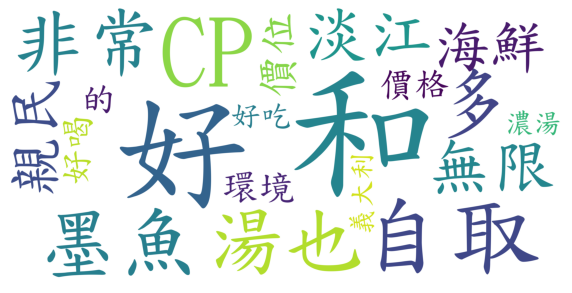

In [103]:
wordcloud = WordCloud(font_path='kaiu.ttf', max_font_size=100, max_words=20, background_color="white",scale=10).generate_from_frequencies(dict(keywords))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>星等數 1 的單詞權重排序</b>

In [104]:
label_index = 0
topn = 20
n_features = lr.coef_.shape[1]

keywords = {}
for i in range(topn):
    topn_index = lr.coef_.argsort()[label_index][::-1][i]
    word_vec = np.zeros(n_features)
    word_vec[topn_index] = 1
    word = onehot.inverse_transform(word_vec.reshape(1,-1))
    keywords.update({word[0][0]: lr.coef_[0][topn_index]})
    print('Top ' + str(i+1) + ':\t' + word[0][0] + '\t' + str(lr.coef_[0][topn_index]))

Top 1:	烤餅	0.7540325474044464
Top 2:	今天	0.4337940828496083
Top 3:	青醬	0.3605134240854513
Top 4:	臭掉	0.2834069369218364
Top 5:	蛤蠣	0.2834069369218364
Top 6:	臭	0.2834069369218364
Top 7:	差	0.28265356201826686
Top 8:	一個	0.2612933711497683
Top 9:	分鐘	0.23675897452402375
Top 10:	了	0.22424058005108904
Top 11:	但是	0.22103714212434533
Top 12:	口味	0.21761916044452298
Top 13:	也	0.21083936611051393
Top 14:	客人	0.2083178582455864
Top 15:	服務生	0.2083178582455864
Top 16:	跟	0.2000110137050484
Top 17:	誘人	0.18884658068617016
Top 18:	小姐	0.18884658068617016
Top 19:	來補	0.18884658068617016
Top 20:	穿	0.18884658068617016


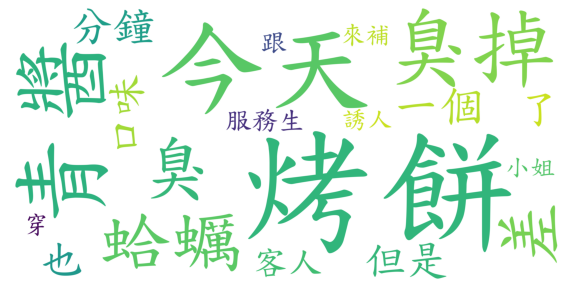

In [105]:
wordcloud = WordCloud(font_path='kaiu.ttf', max_font_size=100, max_words=20, background_color="white",
                     scale=10).generate_from_frequencies(dict(keywords))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 小試身手
- 嘗試不同單詞產生方法：n-gram (+bigram +trigram...)
- 嘗試其他文本向量建立方法：term frequency、tf-idf、topic modeling、word embedding
- 更改機器學習演算法
- 比較不同方法成效差異